## Packages importing

In [143]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import re

BASE_PATH = Path("datasets/")

sns.set()
tqdm.pandas()

 ### Loading data

In [148]:
def get_text_files(file_name: str):
    '''open file and return the content'''
    with open(file_name, "r", encoding="utf8") as file:
        txt = file.read()
    return txt

In [111]:
df = pd.read_csv(BASE_PATH/'files.csv')

In [117]:
df.sample(4, random_state=34)

,file_path,dataset_name
20216,datasets/magazine_raw/mag968.txt,magazine_text
20208,datasets/magazine_raw/mag960.txt,magazine_text
8151,datasets/wikitext_raw/wiki6185.txt,wiki_text
14142,datasets/magazine_raw/mag2577.txt,magazine_text


In [149]:
df['content'] = df['file_path'].progress_map(get_text_files)

100%|██████████████████████████████████████████████████████████████████████████████████| 20251/20251 [03:10<00:00, 106.10it/s]


In [126]:
df.sample(4)

,file_path,dataset_name,content
12428,datasets/magazine_raw/mag1033.txt,magazine_text,വികസനത്തിന് വേണ്ടിയും വ്യവസായങ്ങള്‍ തുടങ്ങുന്ന...
14147,datasets/magazine_raw/mag2581.txt,magazine_text,\n'ഹൃദയത്തിൽ സംഗീതവും സിരകളിൽ ഭാംഗുമായി അലഞ്ഞ...
1958,datasets/wikitext_raw/wiki1176.txt,wiki_text,ഒരു ഇന്ത്യൻ സ്വാതന്ത്ര്യസമര നേതാവായിരുന്നു 'അത...
9838,datasets/wikitext_raw/wiki7703.txt,wiki_text,രവി അപ്പുലു രചനയും സംവിധാനവും നിർവ്വഹിച്ച് 200...


### Analysing

In [150]:
df['length'] = df['content'].progress_map(len)

100%|███████████████████████████████████████████████████████████████████████████████| 20251/20251 [00:00<00:00, 258607.48it/s]


In [34]:
wiki_text = df['dataset_name'] == 'wiki_text'

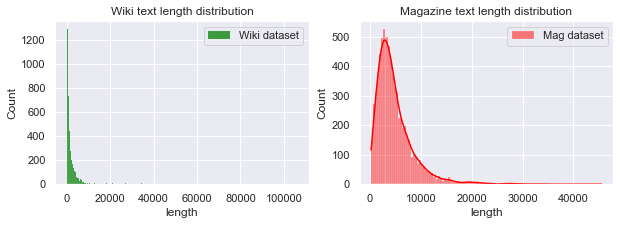

In [40]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.histplot(df[wiki_text]['length'], ax = ax[0], color = 'green', kde = True, label="Wiki dataset")
sns.histplot(df[~wiki_text]['length'], ax = ax[1], color = 'red', kde = True, label="Mag dataset")

ax[0].legend()
ax[1].legend()
ax[0].set_title('Wiki text length distribution')
ax[1].set_title('Magazine text length distribution')

plt.show()

#### Checking for duplicates

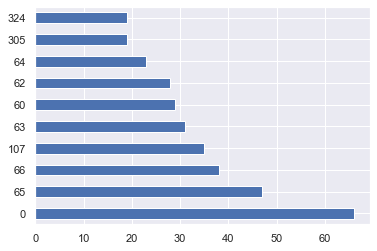

In [121]:
df['length'].value_counts().head(10).plot.barh();

In [138]:
df = df[~df['length'] <= 50]

df.drop(['content', 'length'], axis=1).to_csv(BASE_PATH/'files.csv', index = False)

In [140]:
df = pd.read_csv(BASE_PATH/'files.csv')
df.sample(4)

,file_path,dataset_name
13821,datasets/magazine_raw/mag2288.txt,magazine_text
8320,datasets/wikitext_raw/wiki6337.txt,wiki_text
12116,datasets/wikitext_raw/wiki9754.txt,wiki_text
15029,datasets/magazine_raw/mag3375.txt,magazine_text
